In [1]:
# 10a
lines = readlines("10-input.txt")
X = Array{Int64}(undef, length(lines))
Y = Array{Int64}(undef, length(lines))
vx = Array{Int64}(undef, length(lines))
vy = Array{Int64}(undef, length(lines))
r = r"(-*[0-9]+).*?(-*[0-9]+).*?(-*[0-9]+).*?(-*[0-9]+)"
for (i, l) in enumerate(lines)
    (X[i], Y[i], vx[i], vy[i]) = 
        parse.(Int64, string.(match(r, l).captures))
end

In [2]:
# Here's the plan -- jump forward to where things are close to each
# other then look for when we have at least 8 points in a vertical row
# Eyeballing this list we think this should be at around t = 10_000
min_div = 365
min_div_t = 0
for t in 1:15000
    td = length(unique(X.+t.*vx))
    if td<min_div
        println(t, ": ", td)
        min_div = td
        min_div_t = t
    end
end

1: 218
10580: 214
10583: 212
10585: 207
10588: 203
10593: 195
10598: 194
10601: 182
10609: 174
10613: 168
10617: 152
10621: 149
10625: 124
10629: 120
10633: 90
10637: 81
10639: 78
10640: 71
10641: 48


In [6]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1192


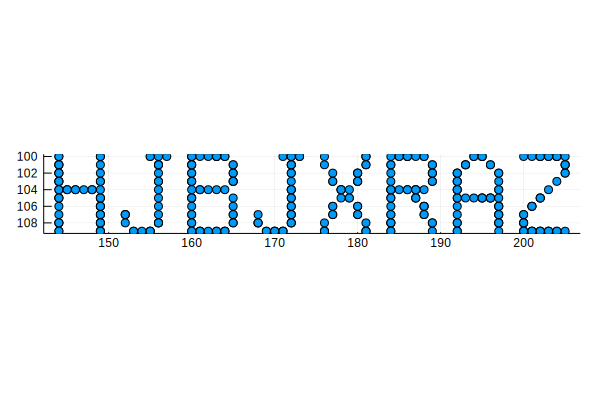

In [11]:
Plots.scatter(X.+vx.*min_div_t, Y.+vy.*min_div_t, 
    aspect_ratio=1, yflip=true, legend=nothing)